<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Instalação-de-pacotes" data-toc-modified-id="Instalação-de-pacotes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Instalação de pacotes</a></span></li><li><span><a href="#Importação-das-bibliotecas" data-toc-modified-id="Importação-das-bibliotecas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importação das bibliotecas</a></span></li><li><span><a href="#Leitura-dos-dados" data-toc-modified-id="Leitura-dos-dados-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Leitura dos dados</a></span></li><li><span><a href="#Descrição-das-variáveis" data-toc-modified-id="Descrição-das-variáveis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Descrição das variáveis</a></span></li><li><span><a href="#Limpeza-e-tratamento-dos-dados" data-toc-modified-id="Limpeza-e-tratamento-dos-dados-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Limpeza e tratamento dos dados</a></span><ul class="toc-item"><li><span><a href="#Dados-duplicados" data-toc-modified-id="Dados-duplicados-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Dados duplicados</a></span></li><li><span><a href="#Dados-ausentes" data-toc-modified-id="Dados-ausentes-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Dados ausentes</a></span></li></ul></li><li><span><a href="#Variável-target" data-toc-modified-id="Variável-target-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Variável target</a></span></li><li><span><a href="#Variáveis-numéricas" data-toc-modified-id="Variáveis-numéricas-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Variáveis numéricas</a></span></li></ul></div>

# Introdução

O conjunto de dados ChoiceBehaviour.csv contém informações sobre a escolha de um agricultor em relação ao aluguel de maquinaria oferecida por uma mesma companhia. Os dados abrangem 4910 agricultores que precisavam decidir entre três opções de máquinas para aluguel, além da possibilidade de não alugar nenhuma delas. Esses dados simulados são compostos por 11 atributos. 

O analista da companhia possui informações relevantes sobre o cliente, como a região de residência do agricultor, os custos de aluguel de cada máquina oferecida, o custo do produto e o preço da máquina base. Porém, essas informações são desconhecidas pelo agricultor. Por sua vez, o agricultor tem acesso apenas à informação do custo para a reparação e aos preços de aluguel das máquinas oferecidas.

Nessa fase inicial de análise, nosso objetivo é compreender as variáveis disponíveis e o problema em questão, a fim de explorar possíveis abordagens sob a perspectiva da empresa. Essa análise mais aprofundada das informações nos ajudará a tomar decisões estratégicas e embasadas, visando otimizar o processo de aluguel de máquinas oferecidas aos trabalhadores rurais.

<img src="data/maquinas.png" 
     align="center" 
     width="500" />

# Descrição dos dados

Nesta etapa, realizamos a importação das bibliotecas, criamos as funções auxiliares para o projeto, leitura do dataset e, por fim, a descrição das variáveis.

## Instalação de pacotes

In [1]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


## Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import catboost as cb
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import random
random.seed(5143023)
# from google.colab import drive
import os

# Exibetodas as colunas
pd.set_option('display.max_columns', None)

# drive.mount('/content/gdrive/', force_remount=True)
# path = '/content/gdrive/MyDrive/7º Semestre/Mineração/Desafio 2'

# os.chdir(path= path)
data = pd.read_excel("data/ChoiceBehaviour.xlsx", dtype={'Regiao':str, 'Id': str, 'Resposta': str})

# Funções auxiliares

In [3]:
def Lucro(row):
    if row.Resposta == '1':
      return row.Pmaquina1 - row.Cmaquina1
    elif row.Resposta == '2':
      return row.Pmaquina2 - row.Cmaquina2
    elif row.Resposta == '3':
      return row.Pmaquina3 - row.Cmaquina3
    else:
      return 0

## Leitura dos dados

In [4]:
print(f"O dataframe possui {data.shape[0]} linhas e {data.shape[1]} colunas.")
data.head()

O dataframe possui 4910 linhas e 12 colunas.


,Id,Regiao,Prima,CustoProduto,Pmaquinabase,Pmaquina1,Pmaquina2,Pmaquina3,Cmaquina1,Cmaquina2,Cmaquina3,Resposta
0,1,560,5073,15742.0,858.20,1268.82,1564.31,1748.41,959.199559,858.20,696.090496,1
1,2,558,1618,33277.0,1008.85,1411.35,1457.82,1583.61,1095.900007,1008.85,976.691531,1
2,3,554,1520,37175.0,910.08,1409.37,1575.85,1630.02,941.364090,910.08,813.934987,1
3,4,555,2238,58449.0,2218.16,3163.57,4220.16,4350.34,2286.583962,2218.16,1662.805304,1
4,5,554,3781,10349.0,628.48,1101.97,1398.68,1705.71,766.440230,628.48,495.156938,1


## Descrição das variáveis

A seguir, ilustramos o dicionário desses dados:

- Regiao: Local onde o agricultor reside.
- Prima: Valor que o agricultor precisa pagar para a reparação da máquina.
- CustoProduto: Custo estimado da maquinaria no momento do aluguel para o agricultor.
- Pmáquinabase: Preço do aluguel da máquina base para dar cobertura ao assegurado.
- Pmáquina1: Preço do aluguel da máquina 1 oferecido ao agricultor.
- Pmáquina2: Preço do aluguel da máquina 2 oferecido ao agricultor.
- Pmáquina3: Preço do aluguel da máquina 3 oferecido ao agricultor.
- Cmáquina1: Custo do aluguel da máquina 1 oferecido ao agricultor.
- Cmáquina2: Custo do aluguel da máquina 2 oferecido ao agricultor.
- Cmáquina3: Custo do aluguel da máquina 3 oferecido ao agricultor.
- Resposta: Indicador da escolha do agricultor, sendo 1 para aluguel da máquina 1, 2 para aluguel da máquina 2, 3 para aluguel da máquina 3 e 0 para o caso em que o agricultor decide não alugar nenhuma máquina oferecida.
- Resposta2: Outro indicador da escolha do agricultor, onde 1 representa o aluguel de uma máquina e 0 indica que o agricultor não alugou nenhuma máquina.

Esses dados oferecem insights valiosos sobre o comportamento de escolha dos agricultores em relação às opções de aluguel de maquinaria. Através de análises e modelos estatísticos, é possível explorar padrões e tomar decisões informadas para otimizar o processo de locaçao dessas máquinas.

Podemos verificar os tipos de cada variável e a quantidade de valores não nulos:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4910 entries, 0 to 4909
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            4910 non-null   object 
 1   Regiao        4910 non-null   object 
 2   Prima         4910 non-null   int64  
 3   CustoProduto  4910 non-null   float64
 4   Pmaquinabase  4910 non-null   float64
 5   Pmaquina1     4910 non-null   float64
 6   Pmaquina2     4910 non-null   float64
 7   Pmaquina3     4910 non-null   float64
 8   Cmaquina1     4910 non-null   float64
 9   Cmaquina2     4910 non-null   float64
 10  Cmaquina3     4910 non-null   float64
 11  Resposta      4910 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 460.4+ KB


## Limpeza e tratamento dos dados

### Dados duplicados

Realizamos uma checagem em nosso conjunto de dados a fim de identificar e lidar com possíveis inconsistências provenientes de dados duplicados. Para preservar a integridade dos dados originais, criamos uma cópia do DataFrame antes de prosseguir com a verificação.

Durante o processo, uma nova coluna chamada "check_dup" foi adicionada ao DataFrame, recebendo valores booleanos que indicam se cada linha está duplicada ou não. Utilizamos a função "duplicated()" para garantir que todas as ocorrências duplicadas fossem marcadas como "True" por meio do argumento "keep=False".

Por fim, realizamos uma filtragem utilizando a função "query()" para selecionar apenas as linhas em que "check_dup" é igual a "True", ou seja, aquelas em que ocorrem duplicações. Essas linhas duplicadas são retornadas como resultado da consulta, permitindo que sejam tratadas conforme necessário.



In [6]:
# Verifica a existência de dados duplicados
data_aux = data.copy()
data_aux['check_dup'] = data_aux.duplicated(keep=False)
print(data_aux.duplicated().sum())
# Aponta onde ocorreu a anomalia 
data_aux.query("check_dup == True")

1


,Id,Regiao,Prima,CustoProduto,Pmaquinabase,Pmaquina1,Pmaquina2,Pmaquina3,Cmaquina1,Cmaquina2,Cmaquina3,Resposta,check_dup
3368,3310,557,3362,88275.0,1119.98,2223.01,2652.0,2774.86,1171.86565,1119.98,938.810988,0,True
3369,3310,557,3362,88275.0,1119.98,2223.01,2652.0,2774.86,1171.86565,1119.98,938.810988,0,True


In [7]:
# Porcentagem dos valores duplicados
duplicated_pct = round(data.duplicated().sum() / len(data) * 100, 2)
print(f"Existem {duplicated_pct}% linhas duplicadas neste dataset.")

Existem 0.02% linhas duplicadas neste dataset.


Notamos que existem dados duplicados na base. Dessa forma, decidimos removê-los.

In [8]:
# Remove dados duplicados
data.drop_duplicates(inplace= True, ignore_index= True)

# Mostramos o tamanho do dataframe após o tratamento
print(f"O dataframe possui {data.shape[0]} linhas e {data.shape[1]} colunas.")
data.head()

O dataframe possui 4909 linhas e 12 colunas.


,Id,Regiao,Prima,CustoProduto,Pmaquinabase,Pmaquina1,Pmaquina2,Pmaquina3,Cmaquina1,Cmaquina2,Cmaquina3,Resposta
0,1,560,5073,15742.0,858.20,1268.82,1564.31,1748.41,959.199559,858.20,696.090496,1
1,2,558,1618,33277.0,1008.85,1411.35,1457.82,1583.61,1095.900007,1008.85,976.691531,1
2,3,554,1520,37175.0,910.08,1409.37,1575.85,1630.02,941.364090,910.08,813.934987,1
3,4,555,2238,58449.0,2218.16,3163.57,4220.16,4350.34,2286.583962,2218.16,1662.805304,1
4,5,554,3781,10349.0,628.48,1101.97,1398.68,1705.71,766.440230,628.48,495.156938,1


Essa abordagem de verificação e identificação de dados duplicados é fundamental para garantir a qualidade e a confiabilidade dos dados utilizados em análises posteriores, contribuindo para uma tomada de decisão mais precisa e embasada.

### Dados ausentes

Também verificamos que neste conjunto de dados não possui nenhum valor faltante. Portanto, não realizamos nenhum tratamento.

In [9]:
# Mostra a quantidade de valores nulos em cada coluna
data.isnull().sum()

Id              0
Regiao          0
Prima           0
CustoProduto    0
Pmaquinabase    0
Pmaquina1       0
Pmaquina2       0
Pmaquina3       0
Cmaquina1       0
Cmaquina2       0
Cmaquina3       0
Resposta        0
dtype: int64

# Criação de features

- **Alugou:** Indica se houve aceitação de pelo menos uma das propostas, correspondendo à Resposta 2 no enunciado do problema.

- **RatioPC1:** Representa a razão entre o custo para a empresa e o preço para o cliente da Proposta 1. Valores altos de RatioPC indicam que o preço está baixo em relação ao custo. Esperamos uma correlação positiva entre RatioPC1 e a escolha da proposta 1. O mesmo princípio se aplica às variáveis RatioPC2 e RatioPC3.

- **Ratio1:** Enquanto a RatioPC utiliza os valores de custo da empresa que não são informados aos clientes, a característica Ratio1 compara apenas os dados informados ao cliente. É a razão entre a média dos preços das outras propostas (2 e 3) e o preço da proposta 1. Indica o quão atraente uma proposta parece em relação às outras. Também esperamos uma correlação positiva entre Ratio1 e a escolha da proposta 1. O mesmo se aplica às variáveis Ratio2 e Ratio3.

- **Escolheu1:** Indica se a proposta 1 foi aceita ou não. Embora não seja utilizada nas estimações, essa variável ajuda a avaliar as correlações. O mesmo se aplica às variáveis Escolheu2 e Escolheu3.

- **PrecoCusto:** Representa a razão entre o custo da máquina e o preço médio das propostas de aluguel. Quanto menores forem os preços, maior será o valor da variável PrecoCusto. Esperamos uma correlação positiva entre PrecoCusto e a variável Alugou.

- **Lucro:** Quantifica o lucro de cada proposta. Se o cliente não alugou a máquina, o lucro é zero. Caso uma proposta seja aceita, o lucro é calculado como a diferença entre o preço e o custo da proposta correspondente.

In [10]:
data['Alugou'] = np.where(data['Resposta'] == '0', '0', '1')
data['RatioPC1'] =data['Cmaquina1']/data['Pmaquina1']
data['RatioPC2'] =data['Cmaquina2']/data['Pmaquina2']
data['RatioPC3'] =data['Cmaquina3']/data['Pmaquina3']
data['Ratio1'] = ((data['Pmaquina2']+ data['Pmaquina3'])/2) / data['Pmaquina1']
data['Ratio2'] = ((data['Pmaquina1']+ data['Pmaquina3'])/2) / data['Pmaquina2']
data['Ratio3'] = ((data['Pmaquina2']+ data['Pmaquina1'])/2) / data['Pmaquina3']
data['Escolheu1'] = np.where(data['Resposta'] == '1', '1', '0')
data['Escolheu2'] = np.where(data['Resposta'] == '2', '1', '0')
data['Escolheu3'] = np.where(data['Resposta'] == '3', '1', '0')
data['PrecoCusto'] = (3*data['CustoProduto'])/(data['Cmaquina1']+data['Cmaquina3']+data['Cmaquina3'])
data['Lucro'] = data.apply(Lucro, axis='columns')

In [11]:
# Mostramos o tamanho do dataframe após o a criação de novas features
print(f"O dataframe possui {data.shape[0]} linhas e {data.shape[1]} colunas.")
data.head()

O dataframe possui 4909 linhas e 24 colunas.


,Id,Regiao,Prima,CustoProduto,Pmaquinabase,Pmaquina1,Pmaquina2,Pmaquina3,Cmaquina1,Cmaquina2,Cmaquina3,Resposta,Alugou,RatioPC1,RatioPC2,RatioPC3,Ratio1,Ratio2,Ratio3,Escolheu1,Escolheu2,Escolheu3,PrecoCusto,Lucro
0,1,560,5073,15742.0,858.20,1268.82,1564.31,1748.41,959.199559,858.20,696.090496,1,1,0.755978,0.548612,0.398128,1.305433,0.964396,0.810202,1,0,0,20.084371,309.620441
1,2,558,1618,33277.0,1008.85,1411.35,1457.82,1583.61,1095.900007,1008.85,976.691531,1,1,0.776491,0.692026,0.616750,1.077490,1.027205,0.905895,1,0,0,32.739171,315.449993
2,3,554,1520,37175.0,910.08,1409.37,1575.85,1630.02,941.364090,910.08,813.934987,1,1,0.667933,0.577517,0.499340,1.137342,0.964365,0.915700,1,0,0,43.407878,468.005910
3,4,555,2238,58449.0,2218.16,3163.57,4220.16,4350.34,2286.583962,2218.16,1662.805304,1,1,0.722786,0.525610,0.382224,1.354561,0.890240,0.848638,1,0,0,31.243927,876.986038
4,5,554,3781,10349.0,628.48,1101.97,1398.68,1705.71,766.440230,628.48,495.156938,1,1,0.695518,0.449338,0.290294,1.408564,1.003689,0.733023,1,0,0,17.672934,335.529770


# Estatísticas descritivas

Vamos dar uma olhada nas estatísticas descritivas para as variáveis numéricas:

In [12]:
data.describe().T.style.format(precision= 2)

,count,mean,std,min,25%,50%,75%,max
Prima,4909.00,2577.70,1346.57,629.00,1719.00,2076.00,3145.00,16370.00
CustoProduto,4909.00,45400.67,30020.53,5873.00,25770.00,36717.00,55324.00,327405.00
Pmaquinabase,4909.00,1168.87,577.09,261.86,768.89,1022.64,1413.33,5606.89
Pmaquina1,4909.00,2003.77,896.81,599.84,1338.50,1764.72,2420.42,5100.46
Pmaquina2,4909.00,2292.94,1202.42,450.01,1385.48,1957.02,2886.07,6338.62
Pmaquina3,4909.00,2463.51,1252.55,458.71,1506.87,2130.44,3121.47,6632.39
Cmaquina1,4909.00,1256.60,600.89,323.97,841.56,1111.52,1517.72,5606.90
Cmaquina2,4909.00,1168.87,577.09,261.86,768.89,1022.64,1413.33,5606.89
Cmaquina3,4909.00,1034.03,456.35,250.54,731.55,924.98,1215.63,4947.27
RatioPC1,4909.00,0.64,0.14,0.17,0.55,0.64,0.73,1.21


E também nas variáveis categóricas:

In [13]:
data[['Id','Regiao','Resposta', 'Alugou', 'Escolheu1', 'Escolheu2', 'Escolheu3']].describe()

,Id,Regiao,Resposta,Alugou,Escolheu1,Escolheu2,Escolheu3
count,4909,4909,4909,4909,4909,4909,4909
unique,4168,13,4,2,2,2,2
top,3310,554,0,0,0,0,0
freq,742,986,4329,4329,4757,4625,4765


Ao analisar os resultados, identificamos que há quatro respostas possíveis. Além disso, fica evidente que os dados estão desequilibrados, uma vez que há 4.329 agricultores que escolheram não alugar nenhuma máquina. Também notamosque os agricultores estão distribuídos em 13 regiões, sendo que na região '554' residem aproximadamente 986 agricultores.

# Análise univariada

Vamos separar as variáveis numéricas das categóricas e realizar a análise univariada:

In [14]:
dados_numericos = data[['Prima', 'CustoProduto', 'Pmaquinabase', 'Pmaquina1',
       'Pmaquina2', 'Pmaquina3', 'Cmaquina1', 'Cmaquina2', 'Cmaquina3',
       'RatioPC1', 'RatioPC2', 'RatioPC3', 'Ratio1',
       'Ratio2', 'Ratio3', 'PrecoCusto','Lucro']]
dados_categoricos = data[['Id','Regiao','Resposta', 'Escolheu1',
                          'Escolheu2', 'Escolheu3']]
dados_target = data[['Alugou']]

## Variável target

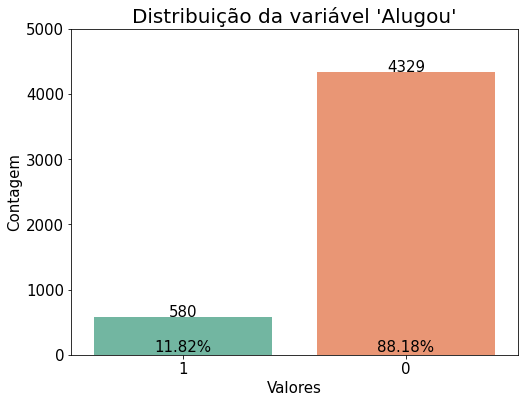

In [15]:
# Configurando o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o countplot
ax = sns.countplot(data=dados_target, x='Alugou',
                  palette='Set2')

# Convertendo as contagens em proporções
total = len(dados_target)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2,
                   height / total,
                   f'{height/total:.2%}',
                   ha='center', va='bottom',
                  fontsize=15)

# Adicionando os valores em cima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()), ha='center',
                va='center', xytext=(0, 5),
                textcoords='offset points',
                fontsize=15)

# Configurando o título e os rótulos dos eixos
plt.title("Distribuição da variável 'Alugou'",
         fontsize=20)

# Eixo x
plt.xlabel('Valores', fontsize=15)
plt.xticks(fontsize=15)
# Eixo y
plt.ylabel('Contagem', fontsize=15)
plt.ylim(0, 5000) # Aumenta o limite
plt.yticks(fontsize=15) # Aumenta o tamanho da fonte

# Exibindo o gráfico
plt.show()

Podemos notar que os dados estão bem desbalanceados e aproximadamente 12% dos agricultores alugaram uma das máquinas

Existem diversas técnicas de tratar dados desbalanceados, abaixo citamos alguns exemplos:

- **Undersampling:** Reduz o número de observações da classe majoritária para diminuir a diferença entre as categorias;

- **Oversampling:** Cria novas observações da classe minoritária, com o objetivo de igualar a proporção das categorias. 

Vamos verificar qual é o melhor método para tratar os dados desbalanceados usando a regressào logística.

In [16]:
# dividir em variáveis de entrada (X) e variáveis de saída (y)
X = data.drop(['Resposta', 'Alugou'], axis= 1)
y = data[['Alugou']]
display(X.head())
display(y.head())

,Id,Regiao,Prima,CustoProduto,Pmaquinabase,Pmaquina1,Pmaquina2,Pmaquina3,Cmaquina1,Cmaquina2,Cmaquina3,RatioPC1,RatioPC2,RatioPC3,Ratio1,Ratio2,Ratio3,Escolheu1,Escolheu2,Escolheu3,PrecoCusto,Lucro
0,1,560,5073,15742.0,858.20,1268.82,1564.31,1748.41,959.199559,858.20,696.090496,0.755978,0.548612,0.398128,1.305433,0.964396,0.810202,1,0,0,20.084371,309.620441
1,2,558,1618,33277.0,1008.85,1411.35,1457.82,1583.61,1095.900007,1008.85,976.691531,0.776491,0.692026,0.616750,1.077490,1.027205,0.905895,1,0,0,32.739171,315.449993
2,3,554,1520,37175.0,910.08,1409.37,1575.85,1630.02,941.364090,910.08,813.934987,0.667933,0.577517,0.499340,1.137342,0.964365,0.915700,1,0,0,43.407878,468.005910
3,4,555,2238,58449.0,2218.16,3163.57,4220.16,4350.34,2286.583962,2218.16,1662.805304,0.722786,0.525610,0.382224,1.354561,0.890240,0.848638,1,0,0,31.243927,876.986038
4,5,554,3781,10349.0,628.48,1101.97,1398.68,1705.71,766.440230,628.48,495.156938,0.695518,0.449338,0.290294,1.408564,1.003689,0.733023,1,0,0,17.672934,335.529770


,Alugou
0,1
1,1
2,1
3,1
4,1


- Testando com oversamplig:

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Carregar os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Aplicar SMOTE no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Treinar o modelo em dados com SMOTE
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Gerar o relatório de classificação
report = classification_report(y_test, y_pred)

# Imprimir o relatório
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1299
           1       1.00      0.99      0.99       174

    accuracy                           1.00      1473
   macro avg       1.00      0.99      1.00      1473
weighted avg       1.00      1.00      1.00      1473



Podemos concluir que o modelo possui um desempenho excelente na classificação das duas classes. Ele é capaz de identificar corretamente a maioria das instâncias positivas e negativas, obtendo altas precision, recall e f1-score.

- Testando com undersamplig:

In [18]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Carregar os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Aplicar Random Undersampling no conjunto de treinamento
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Treinar o modelo em dados com undersampling
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Gerar o relatório de classificação
report = classification_report(y_test, y_pred)

# Imprimir o relatório
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1299
           1       0.94      0.99      0.96       174

    accuracy                           0.99      1473
   macro avg       0.97      0.99      0.98      1473
weighted avg       0.99      0.99      0.99      1473



Podemos concluir que o modelo possui um bom desempenho em identificar corretamente a classe majoritária (0), mas pode ter alguma dificuldade em identificar corretamente a classe minoritária (1).

Criamos uma tabela para facilitar a comparação dos resultados:


| Métrica    | Oversamplig                   | Undersamplig                  |
|------------|-------------------------------|-------------------------------|
| Precision  | Classe 0: 1.00<br>Classe 1: 1.00 | Classe 0: 1.00<br>Classe 1: 0.94 |
| Recall     | Classe 0: 1.00<br>Classe 1: 0.99 | Classe 0: 0.99<br>Classe 1: 0.99 |
| F1-Score   | Classe 0: 1.00<br>Classe 1: 0.99 | Classe 0: 0.99<br>Classe 1: 0.96 |
| Accuracy   | 1.00                          | 0.99                          |

Ambos os métodos apresentam resultados satisfatórios, com altos valores de precision, recall, f1-score e acurácia. No entanto, o oversampling mostra um desempenho um pouco melhor em termos de precision para a classe 1, enquanto o undersampling apresenta um f1-score ligeiramente inferior para a classe 1. Dessa forma, optamos por aplicar o método de oversampling nos dados.

## Variáveis numéricas

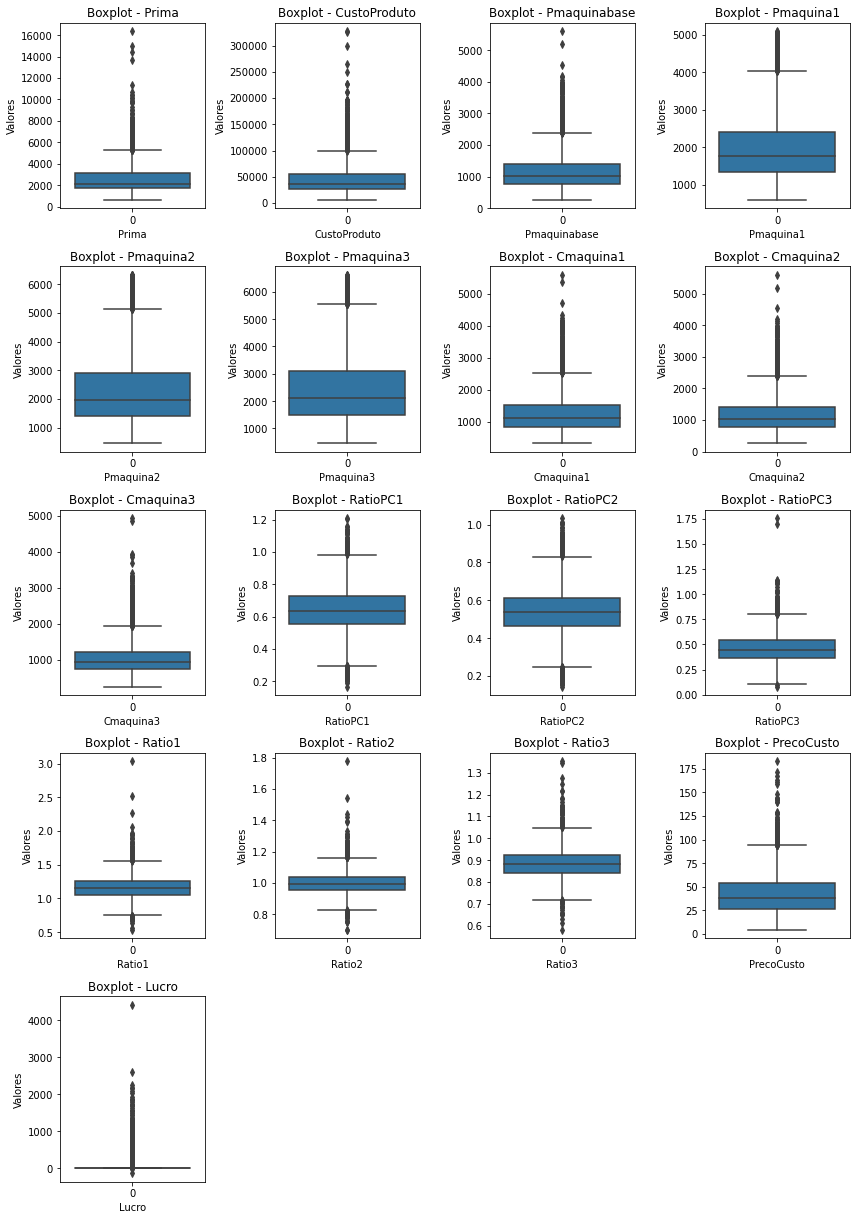

In [19]:
# Configurando o tamanho da figura
plt.figure(figsize=(12, 20))

# Loop para criar os boxplots
for i, coluna in enumerate(dados_numericos.columns):
    plt.subplot(6, 4, i+1)
    sns.boxplot(data=dados_numericos[coluna])
    plt.title(f'Boxplot - {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Valores')

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo os gráficos
plt.show()